## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [3]:
# Checking the number of mice.
print(f"The number of lines is {len(combined_df)}.")
print(f"The number of unique mice in the study is {combined_df['Mouse ID'].nunique()}.")

The number of lines is 1893.
The number of unique mice in the study is 249.


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This will give the duplicate row, excluding the first instance.
# Get all of the data for that mouse ID
duplicates = combined_df[combined_df.duplicated()]
duplicates

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df.index[909])

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of lines is {len(clean_df)}.")
print(f"The number of unique mice in the study is {clean_df['Mouse ID'].nunique()}.")

The number of lines is 1892.
The number of unique mice in the study is 249.


## Summary Statistics

In [7]:
# Calculate the mean, median, variance, standard deviation and standard error of the tumor volume for each drug regimen
# Group the data by Drug Regimen
drug_group = clean_df.groupby("Drug Regimen")

# Calculate the mean of the tumor volume and store into a variable
drug_mean = drug_group['Tumor Volume (mm3)'].mean()

# Calculate the median of the tumor volume and store into a variable
drug_median = drug_group['Tumor Volume (mm3)'].median()

# Calculate the variance of the tumor volume and store into a variable
drug_var = drug_group['Tumor Volume (mm3)'].var()

# Calculate the standard deviation of the tumor volume and store into a variable
drug_stdev = drug_group['Tumor Volume (mm3)'].std()

# Calculate the standard error of the tumor volume and store into a variable
drug_sem = drug_group['Tumor Volume (mm3)'].sem()

In [8]:
# Generate a summary statistics table with the mean, median, variance, standard deviation and standard error for each drug regimen
summary_stats = pd.DataFrame({"Mean": drug_mean,
                                      "Median": drug_median,
                                      "Variance": drug_var,
                                      "Standard Deviation": drug_stdev,
                                      "Standard Error": drug_sem
                                     })
summary_stats

Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.368318  50.909965  42.278090            6.502160   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error  
Drug Regimen                  
Capomulin           0.329346  
Ceftamin            0.469821  
Infubinol           0.492236  
Ketapril            0.603860  
Naftisol            0.596466  
Placebo             0.581331  
Propriva            0.514041  
Ramicane            0.320955  
Stelasyn            0.573111  
Zoniferol           0.516398

In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = drug_group.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

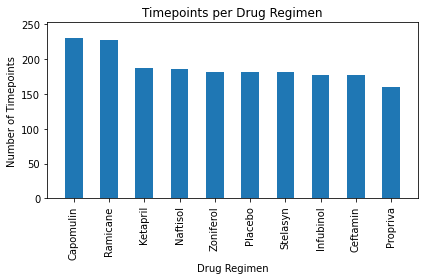

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# First create a DataFrame showing the number of timepoints for each drug regimen
drug_points = pd.value_counts(clean_df['Drug Regimen'])

# Create a bar chart using Pandas Plot
drug_points.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlim(-0.75, len(drug_points)-.25)
plt.ylim(0, max(drug_points)*1.10)
plt.tight_layout()
plt.show()

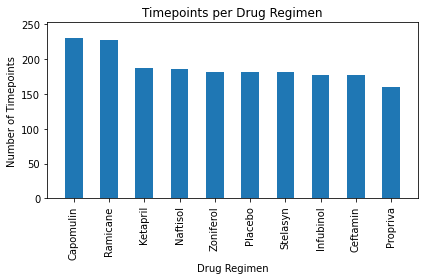

In [54]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# First define the x-axis and y-axis data sets
x_axis = clean_df['Drug Regimen'].value_counts().index
y_axis = clean_df['Drug Regimen'].value_counts()

# Plot the bar chart using Matplotlib
plt.bar(x_axis, y_axis, align="center", width=0.5)
plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xlim(-0.75, len(drug_points)-.25)
plt.ylim(0, max(drug_points)*1.10)
plt.tight_layout()
plt.show()

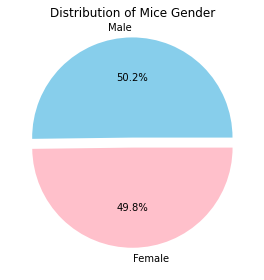

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# First create a DataFrame showing the number of male and female mice in the drug study
gender_count = pd.value_counts(mouse_metadata['Sex'])

# Create a pie chart using Pandas Plot
explode = (0.1,0 )
color = ['skyblue', 'pink']

gender_count.plot(kind="pie", explode=explode, colors=color, autopct="%1.1f%%")
plt.title("Distribution of Mice Gender")
plt.ylabel('')
plt.tight_layout()
plt.show()


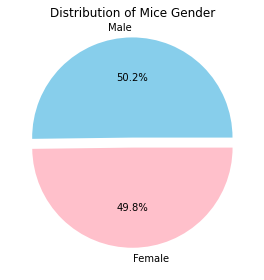

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# First define the data set and labels
labels = mouse_metadata['Sex'].value_counts().index
data = mouse_metadata['Sex'].value_counts()

# Plot the bar chart using Matplotlib
explode = (0.1, 0)
color = ['skyblue', 'pink']

plt.pie(data, labels=labels, explode=explode, colors=color, autopct="%1.1f%%")
plt.title("Distribution of Mice Gender")
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
